# KNN 2진분류
- 오렌지, 그레이프 후추츠 분류문제

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

Seed = 123

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/devdio/flyai_datasets/main/citrus.csv')
df 

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,grapefruit,15.35,253.89,149,77,20
9996,grapefruit,15.41,254.67,148,68,7
9997,grapefruit,15.59,256.50,168,82,20
9998,grapefruit,15.92,260.14,142,72,11


## Data 확인

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


c:\Users\hyundong\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hyundong\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='name', ylabel='diameter'>

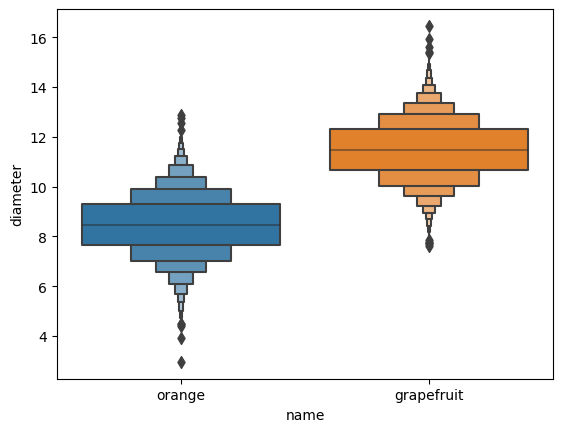

In [10]:
sns.boxenplot(data=df,x='name',y='diameter')

c:\Users\hyundong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hyundong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hyundong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hyundong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

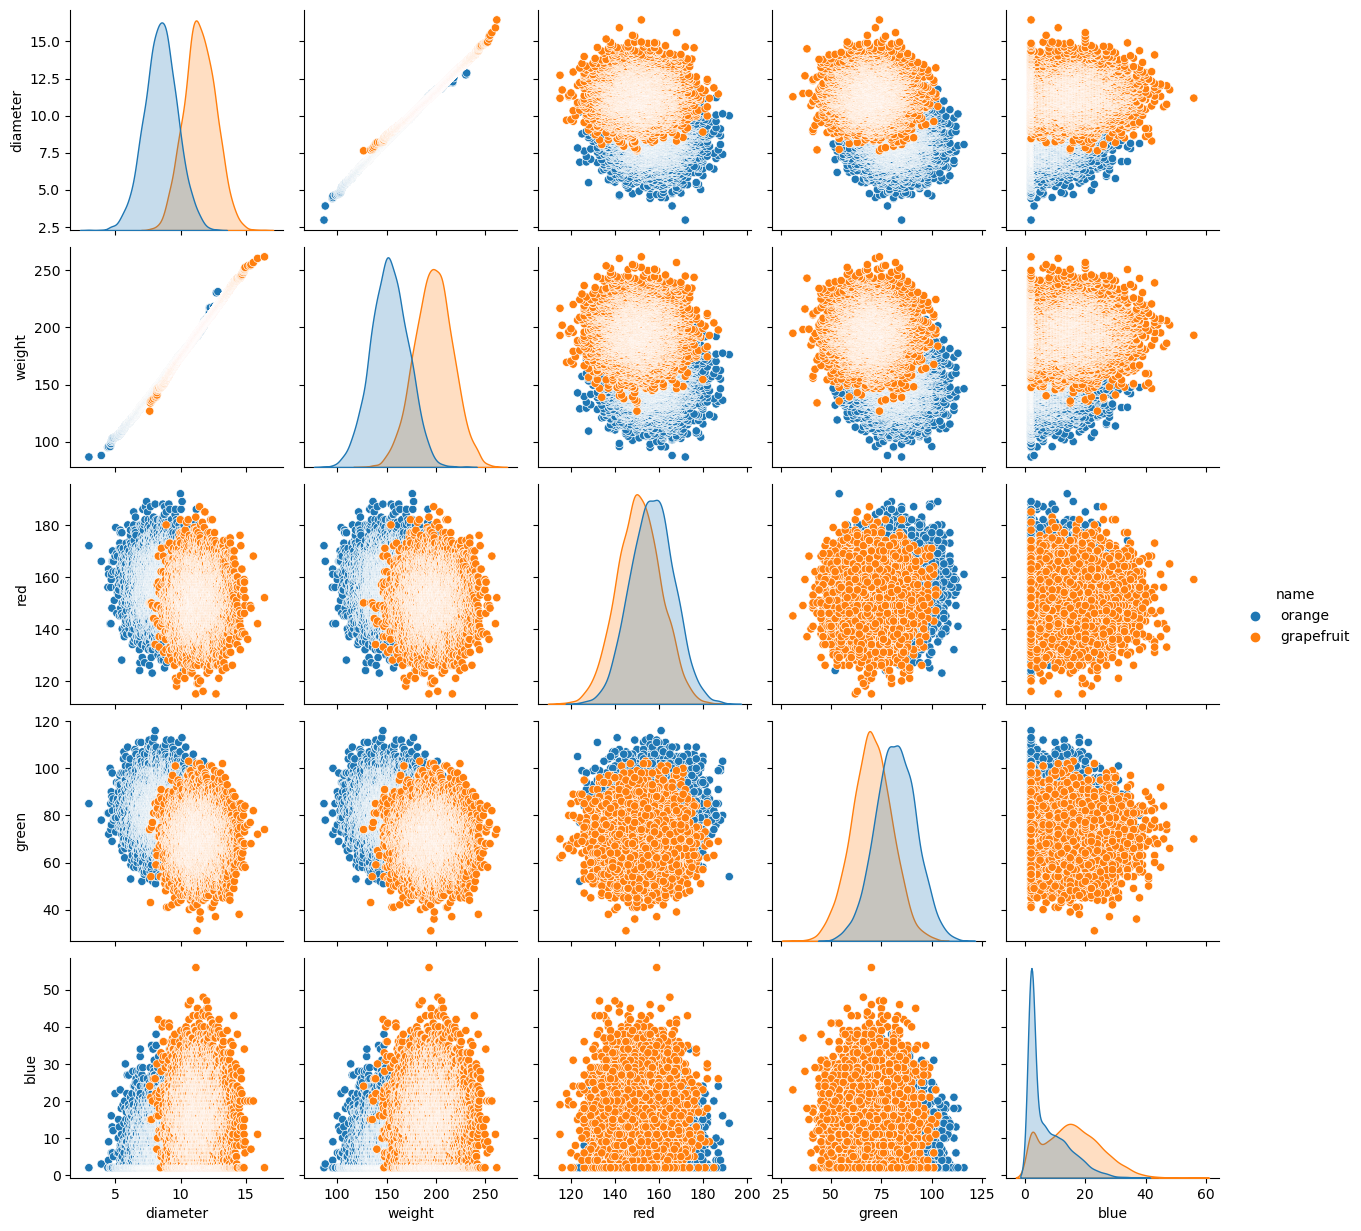

In [36]:
sns.pairplot(df, hue="name")
plt.show()

## 범주형

<Axes: xlabel='name'>

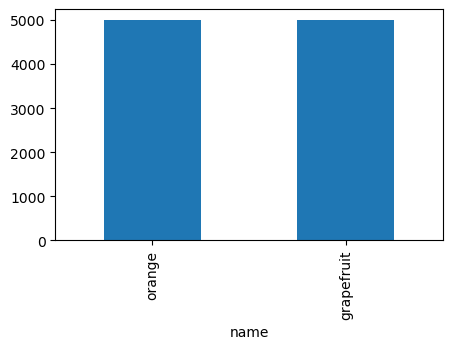

In [29]:
df['name'].value_counts().plot(kind='bar',figsize=(5,3)) # 데이터 균형 확인

## 수치형 

<Axes: >

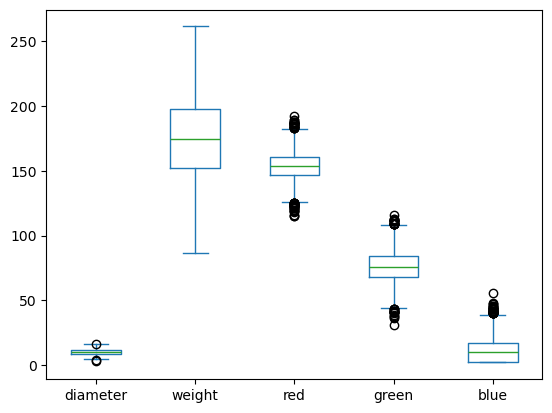

In [55]:
# diameter, weight, red, green, blue
df[['diameter','weight','red','green','blue']].plot(kind='box')

In [40]:
df.isna().sum(axis=0)

name        0
diameter    0
weight      0
red         0
green       0
blue        0
dtype: int64

In [43]:
df.duplicated().sum()

0

In [44]:
df = df.sample(frac=1,random_state=Seed)
df.head()

,name,diameter,weight,red,green,blue
2656,orange,8.58,153.86,143,76,2
445,orange,6.80,127.51,161,87,4
9505,grapefruit,13.08,221.93,163,67,16
332,orange,6.59,124.75,162,96,3
4168,orange,9.67,171.24,161,88,15


In [47]:
idx_train = int(len(df) * 0.6) #train
idx_val = int(len(df) * 0.8) #validation

In [50]:
train = df.iloc[:idx_train,:]
val = df.iloc[idx_train:idx_val,:]
test = df.iloc[idx_val:,:]

train.shape,val.shape,test.shape

((6000, 6), (2000, 6), (2000, 6))

### X,y 변수 분리 

In [52]:
x_train = train.drop('name',axis=1)
y_train = train['name']

x_val = val.drop('name',axis=1)
y_val = val['name']

x_train.head()

,diameter,weight,red,green,blue
2656,8.58,153.86,143,76,2
445,6.80,127.51,161,87,4
9505,13.08,221.93,163,67,16
332,6.59,124.75,162,96,3
4168,9.67,171.24,161,88,15


In [54]:
y_train.value_counts(), y_val.value_counts()

(name
 orange        3009
 grapefruit    2991
 Name: count, dtype: int64,
 name
 grapefruit    1019
 orange         981
 Name: count, dtype: int64)

## scaling 

In [57]:
u = x_train.mean()
std = x_train.std()

x_train = (x_train - u) / std

In [61]:
x_val = (x_val - u) / std
x_val

,diameter,weight,red,green,blue
1561,-1.069979,-1.066777,0.495888,0.845889,0.849340
1381,-1.131549,-1.139652,-2.377435,0.336496,0.187474
1495,-1.090502,-1.092095,-0.366109,-0.767188,0.077163
800,-1.403479,-1.384624,-0.174554,-0.257795,-0.143460
3083,-0.572295,-0.567254,0.208555,2.883459,-1.025948
...,...,...,...,...,...
5882,0.202452,0.157739,-0.078777,-0.257795,-0.143460
7215,0.674483,0.681212,0.687443,-1.191681,0.187474
8912,1.285044,1.279613,-0.270332,-0.852086,1.290584
7131,0.648829,0.654867,-0.653442,0.591192,0.187474


In [60]:
ss_dic = {'mean':u,'std':std}

,diameter,weight,red,green,blue
2656,-0.705695,-0.714716,-1.036551,-0.003099,-1.025948
445,-1.618972,-1.616252,0.687443,0.930787,-0.805326
9505,1.603152,1.614226,0.878997,-0.767188,0.518407
332,-1.726718,-1.710683,0.783220,1.694876,-0.915637
4168,-0.146441,-0.120078,0.687443,1.015686,0.408096


## 인코딩

In [63]:
label_dict = {'grapefruit':0,'orange':1}

In [64]:
y_train = y_train.map(label_dict)
y_val = y_val.map(label_dict)

y_train,y_val

(2656    1
 445     1
 9505    0
 332     1
 4168    1
        ..
 2684    1
 4926    1
 1646    1
 7091    0
 565     1
 Name: name, Length: 6000, dtype: int64,
 1561    1
 1381    1
 1495    1
 800     1
 3083    1
        ..
 5882    0
 7215    0
 8912    0
 7131    0
 2072    1
 Name: name, Length: 2000, dtype: int64)

In [67]:
x_train_n = x_train.to_numpy()
y_train_n = y_train.to_numpy()
x_val_n = x_val.to_numpy()
y_val_n = y_val.to_numpy()

In [69]:
print(x_train_n.shape,y_train_n.shape)
print(x_val_n.shape,y_val_n.shape)
print(type(x_train_n),type(y_train_n))
print(type(x_val_n),type(y_val_n))

(6000, 5) (6000,)
(2000, 5) (2000,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [76]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(x_train_n,y_train_n)

KNeighborsClassifier()

## 검증

In [77]:
y_pred = clf.predict(x_val_n)
y_pred

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [78]:
(y_pred == y_val_n).sum()/len(y_val_n)

0.9185

## test data 확인

In [81]:
x_test = test.drop('name',axis=1)
y_test = test['name']
x_test.head(5),y_test.head(5)

(      diameter  weight  red  green  blue
 1249      7.65  140.14  157     82     7
 7810     11.65  200.46  135     72     2
 5193      9.32  162.83  159     63     2
 4902     11.10  190.76  160     76     5
 6801     11.01  190.48  142     66    27,
 1249        orange
 7810    grapefruit
 5193    grapefruit
 4902        orange
 6801    grapefruit
 Name: name, dtype: object)

In [82]:
x_test_n = (x_test-u)/std
x_test_n

,diameter,weight,red,green,blue
1249,-1.182856,-1.184131,0.304333,0.506294,-0.474393
7810,0.869452,0.879653,-1.802771,-0.342694,-1.025948
5193,-0.326018,-0.407817,0.495888,-1.106783,-1.025948
4902,0.587259,0.547778,0.591665,-0.003099,-0.695015
6801,0.541082,0.538198,-1.132329,-0.852086,1.731828
...,...,...,...,...,...
9785,1.859690,1.898201,-0.749219,-0.852086,-1.025948
7763,0.859190,0.863572,-0.940774,0.930787,-1.025948
5218,-0.295233,-0.368129,0.591665,-0.342694,0.297785
1346,-1.141810,-1.151285,0.687443,1.100585,-0.474393


In [83]:
y_test_e = y_test.map(label_dict)
y_test_e

1249    1
7810    0
5193    0
4902    1
6801    0
       ..
9785    0
7763    0
5218    0
1346    1
3582    1
Name: name, Length: 2000, dtype: int64

In [84]:
x_test_n=x_test_n.to_numpy()
y_test_n=y_test_e.to_numpy()

In [85]:
print(x_test_n.shape,y_test_n.shape)
print(type(x_test_n),type(y_test_n))


(2000, 5) (2000,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [86]:
y_pred_final = clf.predict(x_test_n)
y_pred_final

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [92]:
(y_pred_final == y_test_n).sum()/len(y_test_n)

0.918